In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Path to your original file
file_path = 'bank-full.csv'  # Replace with your file's path

# Load the dataset with the correct delimiter (';')
data = pd.read_csv(file_path, sep=';', encoding='latin1')

# Save the cleaned dataset to a new CSV file
output_file_path = 'cleaned_bank_dataset.csv'
data.to_csv(output_file_path, index=False)

print(f"Cleaned dataset saved to: {output_file_path}")

Cleaned dataset saved to: cleaned_bank_dataset.csv


In [6]:
try:
    df = pd.read_csv('cleaned_bank_dataset.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("The file 'cleaned_bank_dataset.csv' was not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset loaded successfully.


In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
# check the df structe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
# find number of rows and column
df.shape

(45211, 17)

In [10]:
# describe df numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
# Iterate over all columns in the DataFrame that have an object (string) data type
for col in df.select_dtypes(include='object').columns:
    # Print the name of the current column
    print(f"Column: {col}")

    # Print the unique values present in this column
    print("Unique Values:", df[col].unique())


Column: job
Unique Values: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Column: marital
Unique Values: ['married' 'single' 'divorced']
Column: education
Unique Values: ['tertiary' 'secondary' 'unknown' 'primary']
Column: default
Unique Values: ['no' 'yes']
Column: housing
Unique Values: ['yes' 'no']
Column: loan
Unique Values: ['no' 'yes']
Column: contact
Unique Values: ['unknown' 'cellular' 'telephone']
Column: month
Unique Values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Column: poutcome
Unique Values: ['unknown' 'failure' 'other' 'success']
Column: y
Unique Values: ['no' 'yes']


# Exploratory Data **Analysis**

1. Find Unwanted Columns

   * there is no unwanted column present in given dataset to remove






2. Find Missing Values

In [12]:
# Identify columns with missing values
features_na = [feature for feature in df.columns if df[feature].isnull().sum() > 0]

# Iterate through the identified columns with missing values
for feature in features_na:
    # Calculate the percentage of missing values and round to 4 decimal places
    missing_percentage = np.round(df[feature].isnull().mean() * 100, 4)

    # Print the feature name and its percentage of missing values
    print(f"{feature}: {missing_percentage}% missing values")
else:
    # If no features with missing values are found, print a confirmation message
    if not features_na:
        print("No missing value found.")

No missing value found.


3. Find Features with One Value

In [13]:
# Iterate over each column in the DataFrame
for column in df.columns:
    # Print the column name and the number of unique values in that column
    print(f"Column: {column}, Unique Values: {df[column].nunique()}")

Column: age, Unique Values: 77
Column: job, Unique Values: 12
Column: marital, Unique Values: 3
Column: education, Unique Values: 4
Column: default, Unique Values: 2
Column: balance, Unique Values: 7168
Column: housing, Unique Values: 2
Column: loan, Unique Values: 2
Column: contact, Unique Values: 3
Column: day, Unique Values: 31
Column: month, Unique Values: 12
Column: duration, Unique Values: 1573
Column: campaign, Unique Values: 48
Column: pdays, Unique Values: 559
Column: previous, Unique Values: 41
Column: poutcome, Unique Values: 4
Column: y, Unique Values: 2


4. Explore the Categorical Features

In [14]:
# Identify all categorical features in the DataFrame
# Categorical features are columns with data type 'object' ('O') and exclude the target column 'y'
categorical_features = [
    feature for feature in df.columns
    if (df[feature].dtypes == 'O' and feature not in ['y'])
]

# Display the list of categorical features
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [15]:
# Iterate through each feature in the list of categorical features
for feature in categorical_features:
    # Get the number of unique categories for the current feature
    num_categories = len(df[feature].unique())

    # Print the feature name and the number of unique categories
    print(f"The feature is '{feature}' and the number of categories is {num_categories}")


The feature is 'job' and the number of categories is 12
The feature is 'marital' and the number of categories is 3
The feature is 'education' and the number of categories is 4
The feature is 'default' and the number of categories is 2
The feature is 'housing' and the number of categories is 2
The feature is 'loan' and the number of categories is 2
The feature is 'contact' and the number of categories is 3
The feature is 'month' and the number of categories is 12
The feature is 'poutcome' and the number of categories is 4


5. Find Categorical Feature Distribution

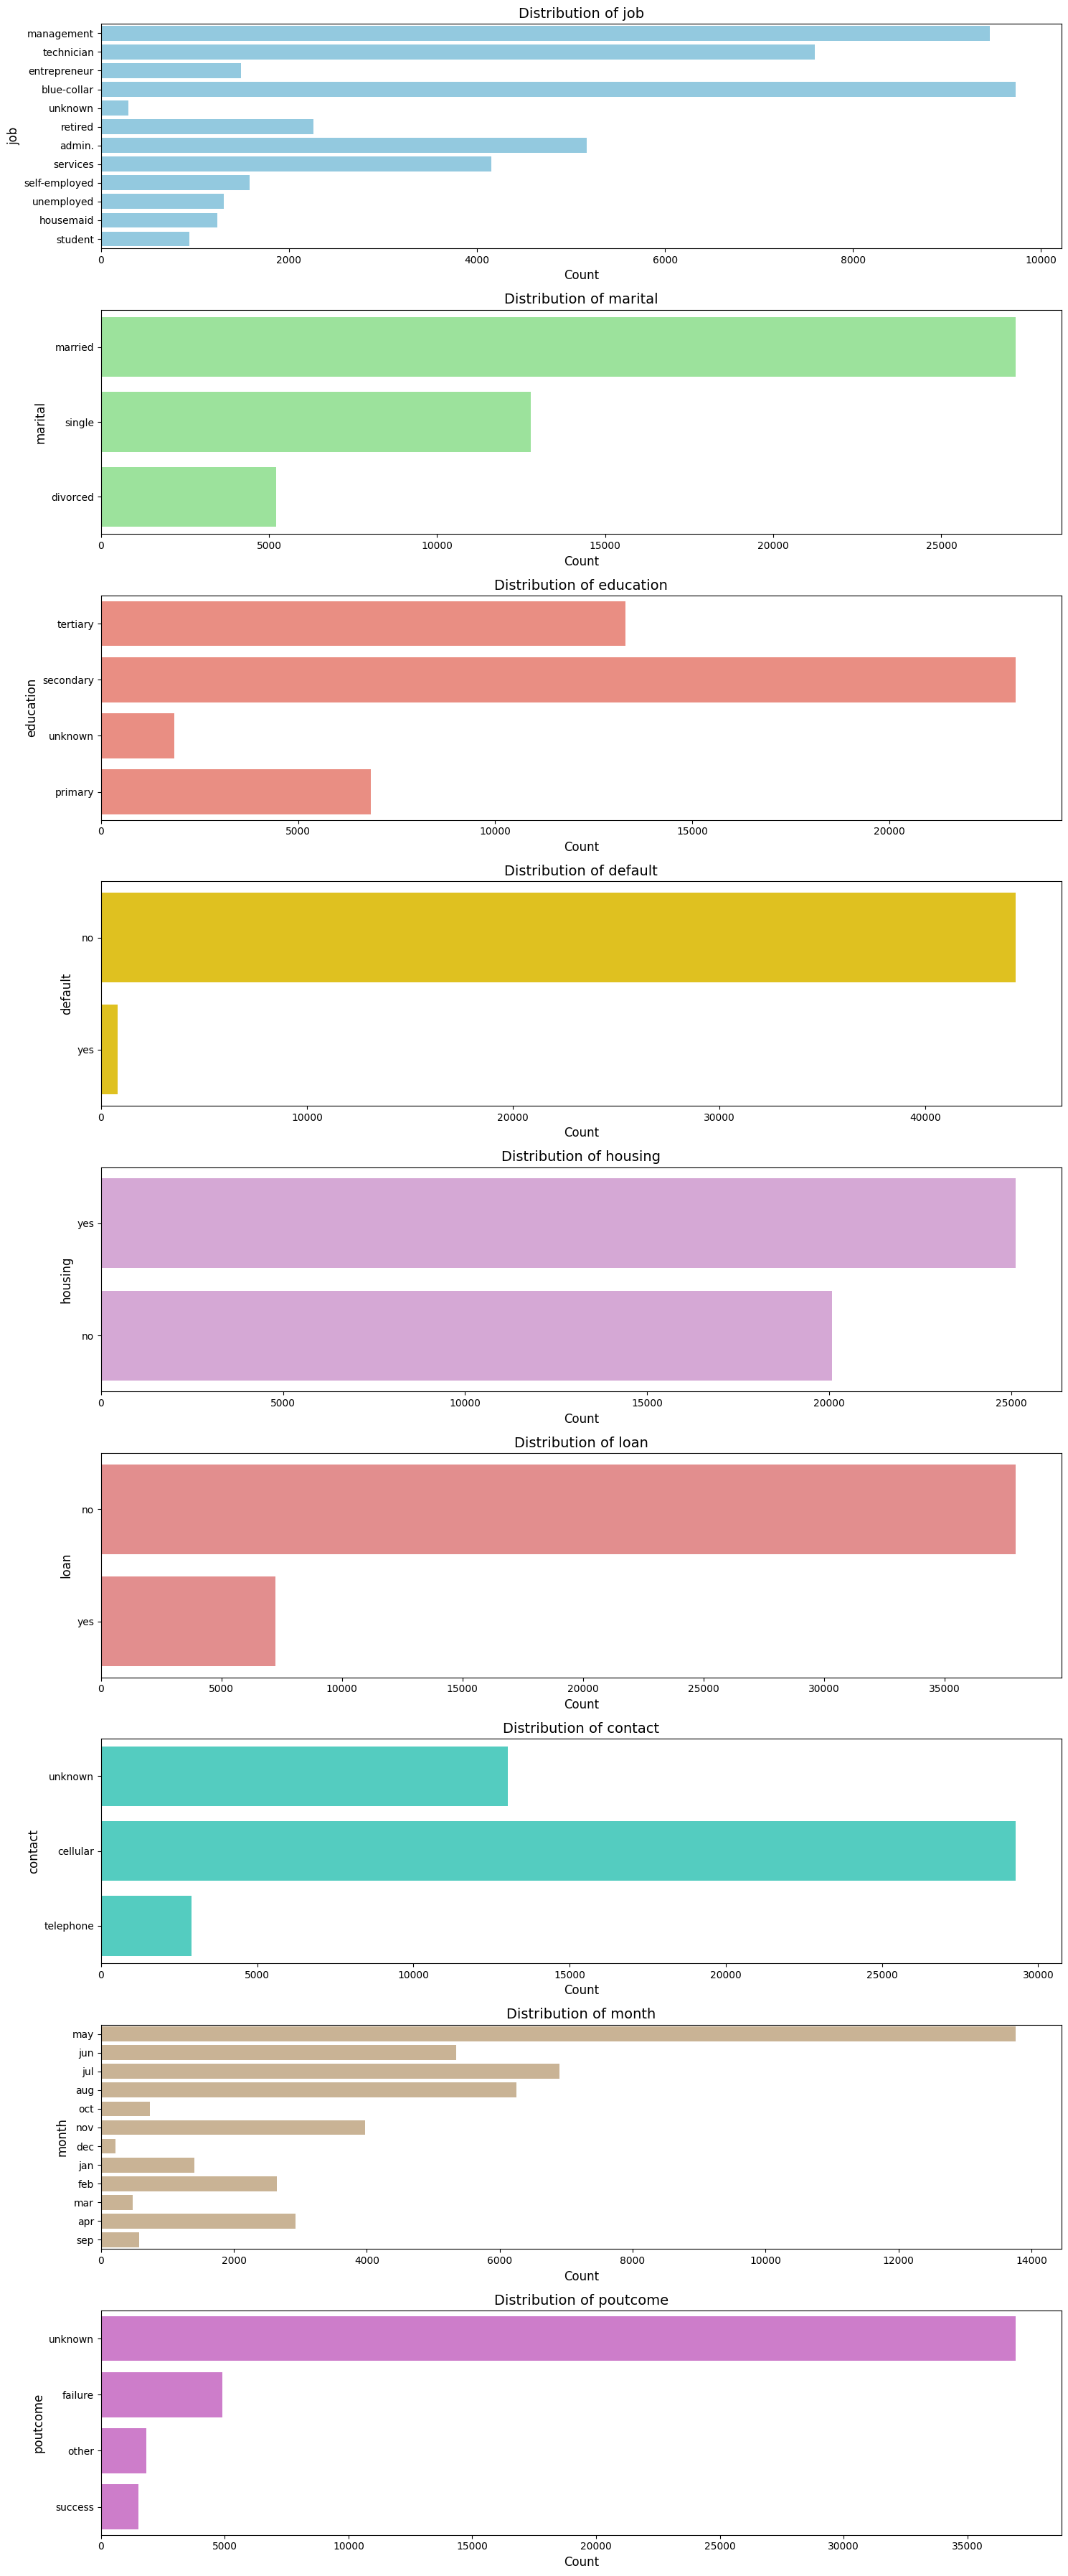

In [16]:
# Define a list of colors to use for the plots
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'plum', 'lightcoral', 'turquoise', 'tan', 'orchid', 'peru']

# Set up a large figure for multiple subplots
plt.figure(figsize=(15, len(categorical_features) * 4), facecolor='white')

# Initialize the subplot counter
plotnumber = 1

# Loop through each categorical feature
for i, categorical_feature in enumerate(categorical_features):
    # Create a subplot for the current feature
    ax = plt.subplot(len(categorical_features), 1, plotnumber)  # Adjust rows dynamically

    # Cycle through colors using the modulus operator
    sns.countplot(y=categorical_feature, data=df, color=colors[i % len(colors)])

    # Set labels and title for the plot
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(categorical_feature, fontsize=12)
    plt.title(f"Distribution of {categorical_feature}", fontsize=14)

    # Increment the subplot counter
    plotnumber += 1

# Adjust layout to prevent overlap and show the plots
plt.tight_layout()
plt.show()

6. Relationship between Categorical Features and Label

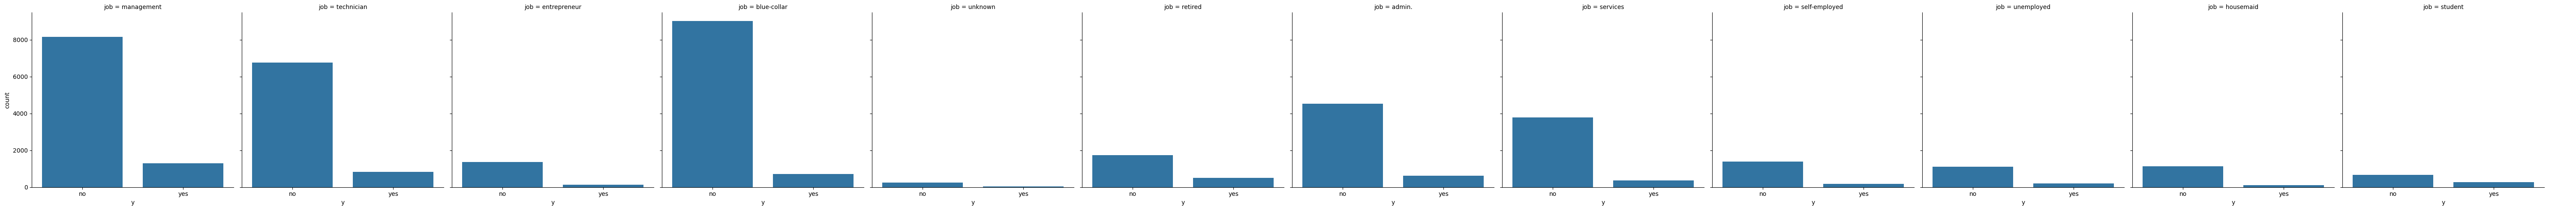

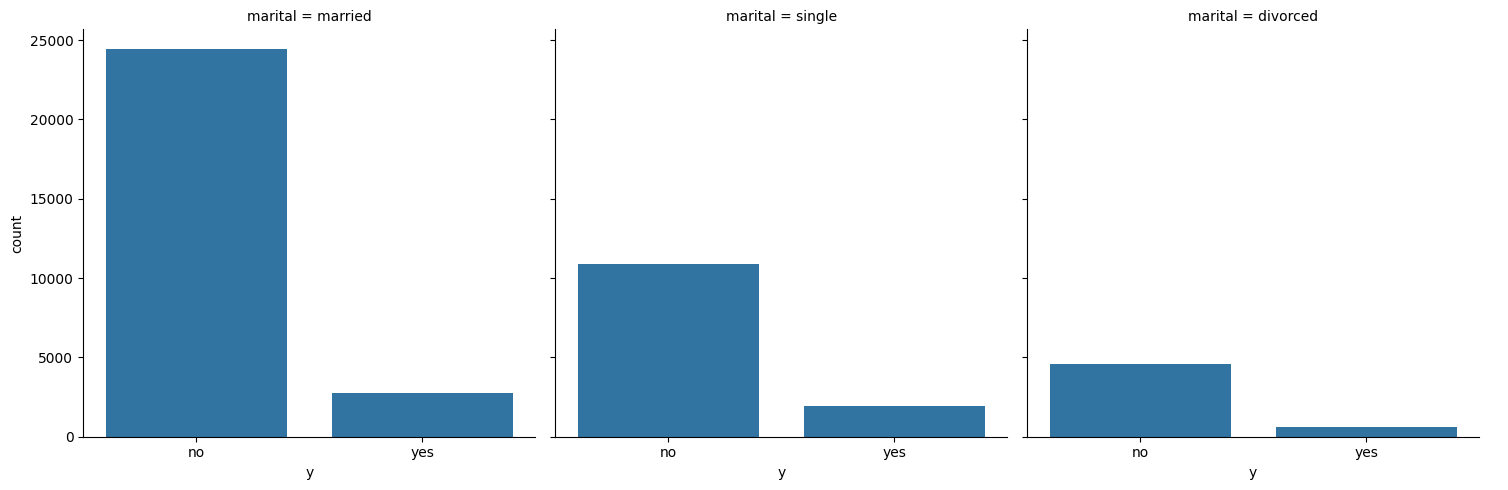

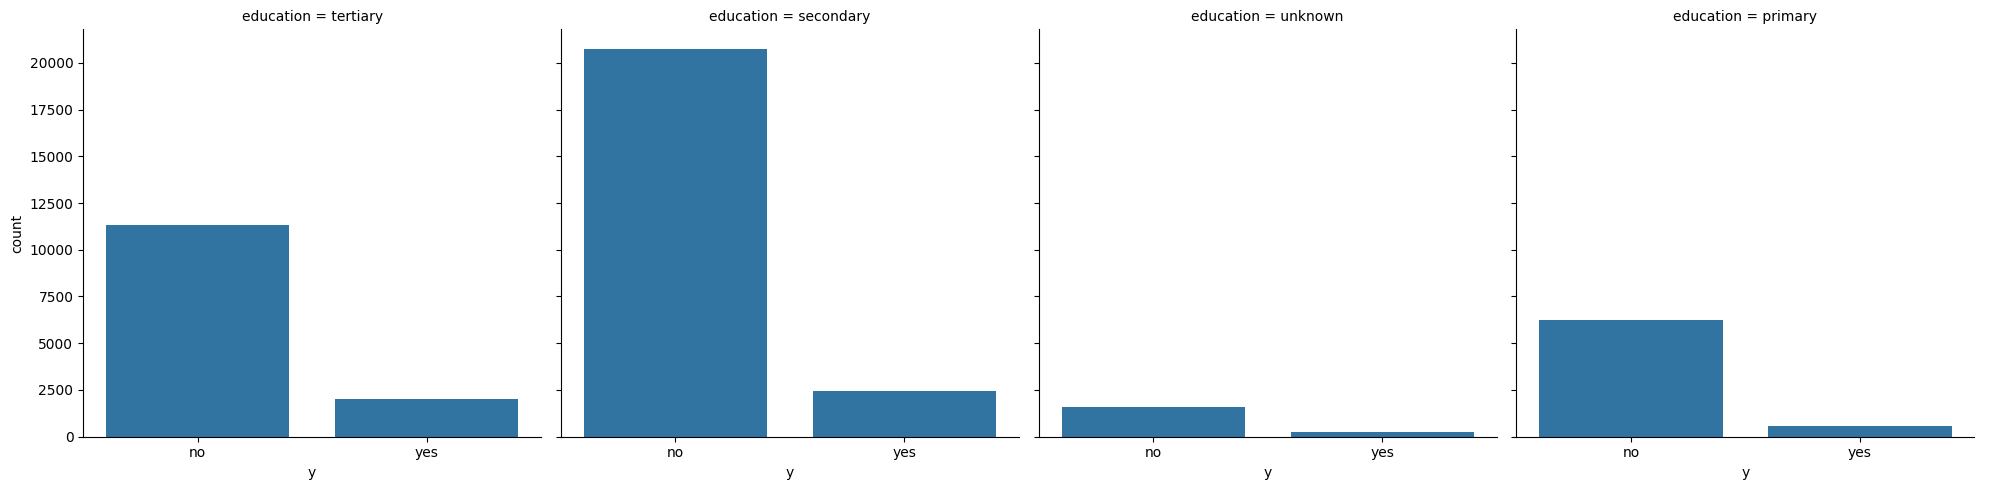

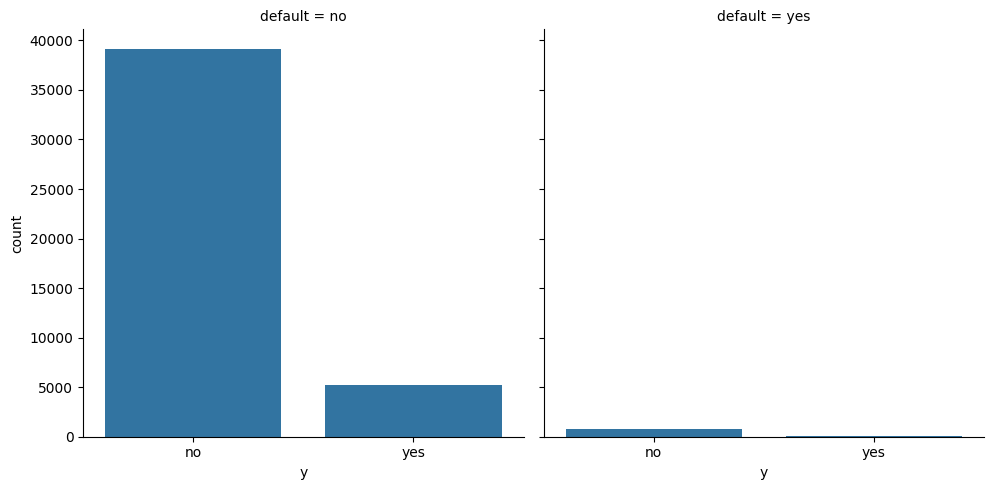

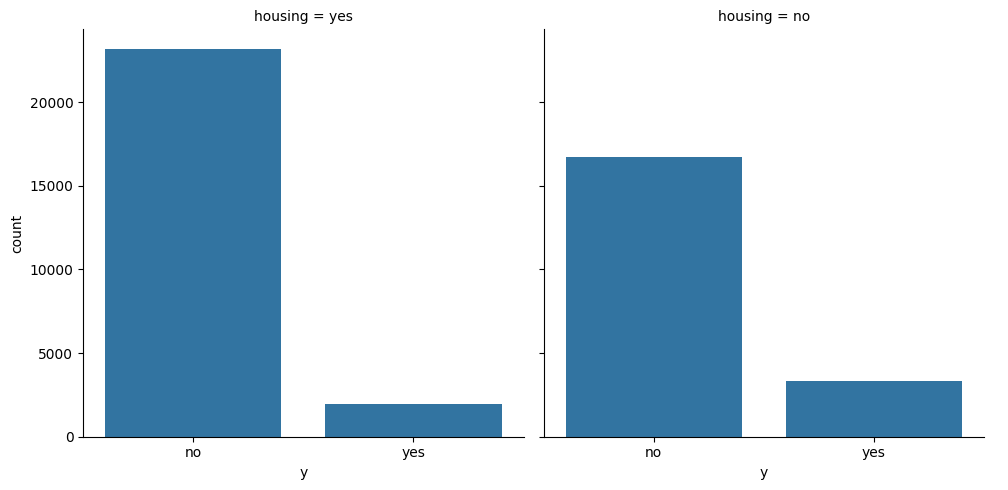

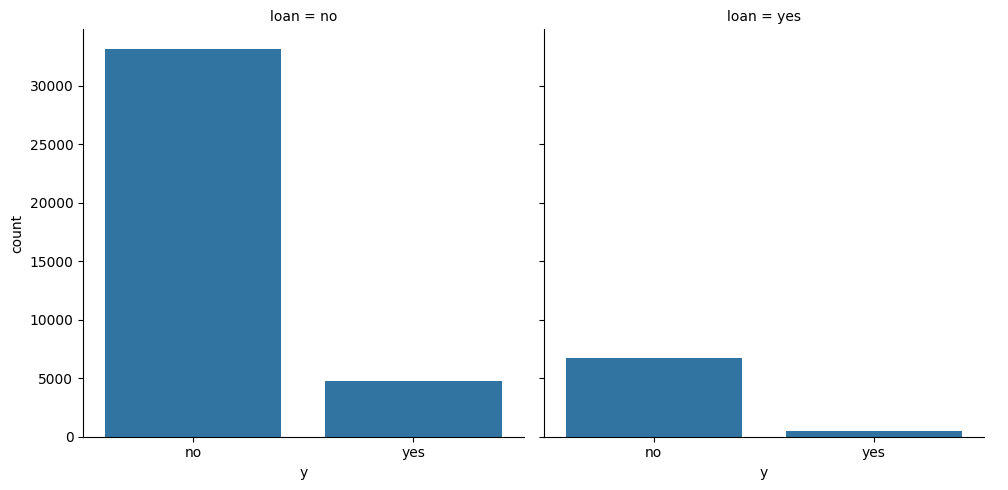

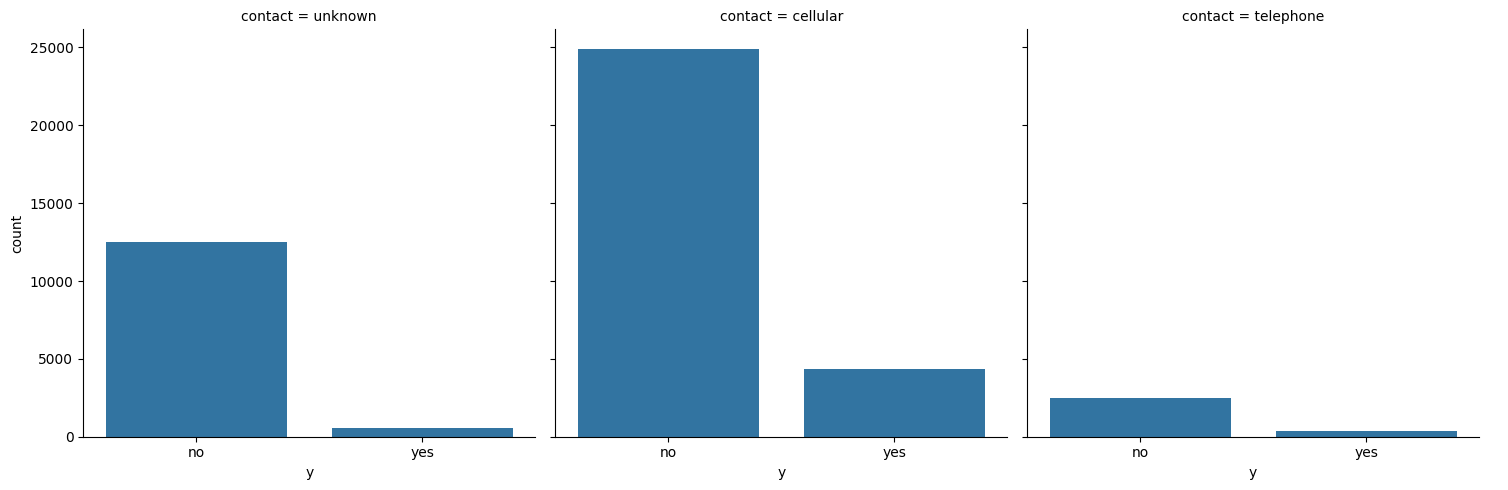

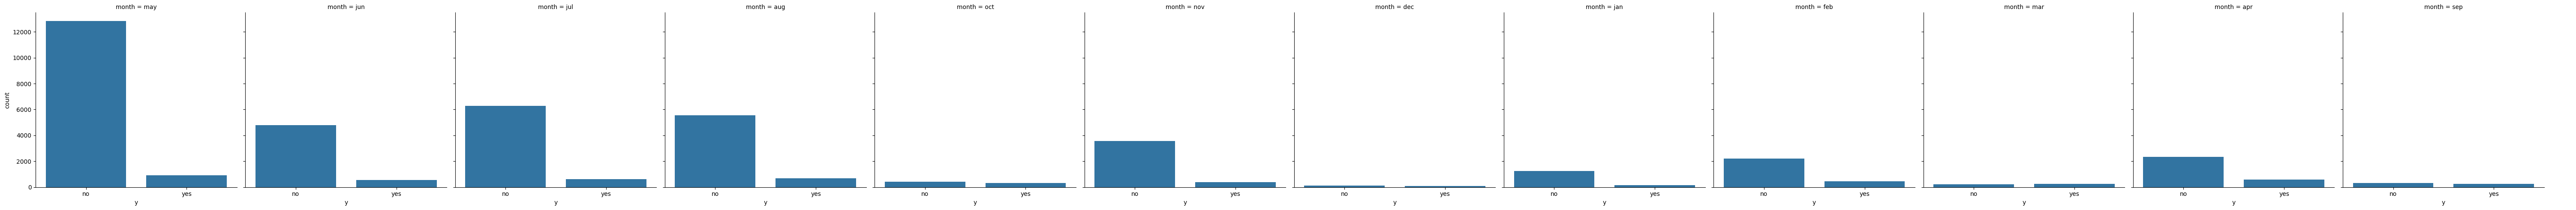

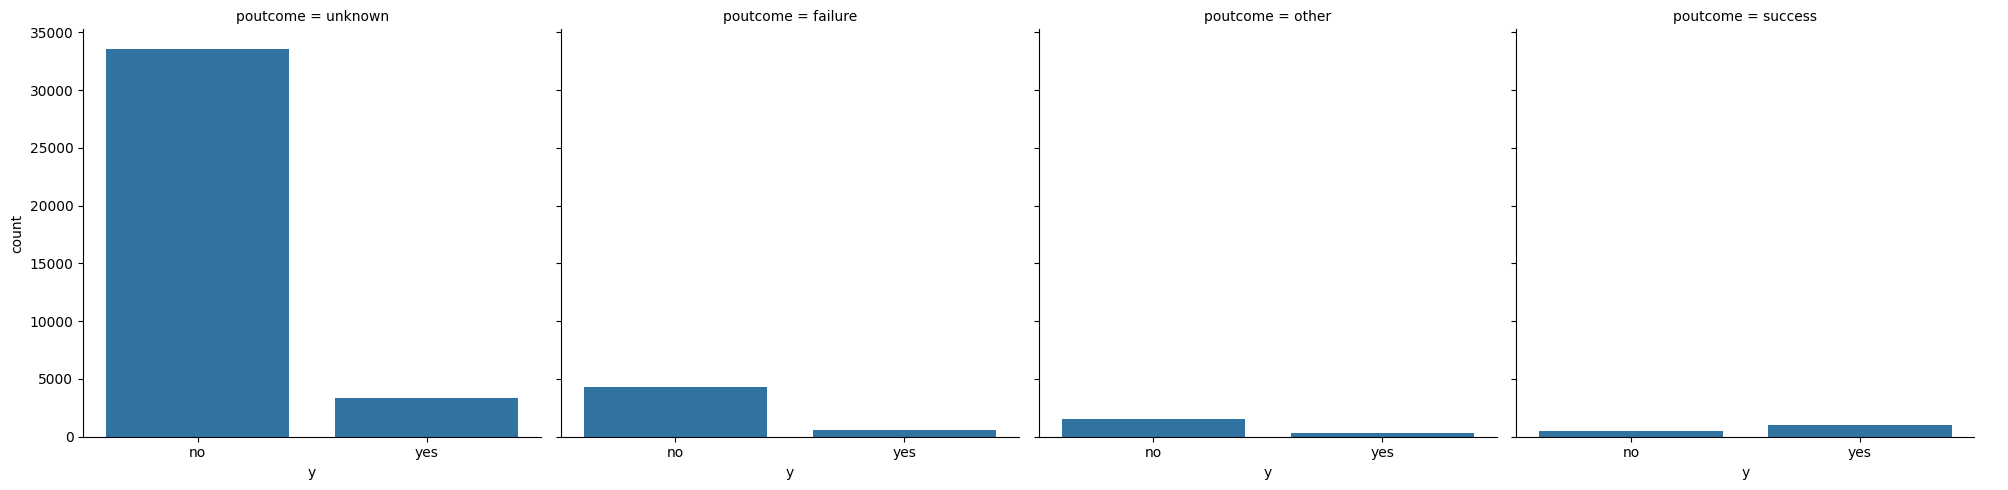

In [17]:
# Check the relationship between the target label and categorical features
# Explore how the categorical features are related to the target label ('y') in the dataset

for categorical_feature in categorical_features:
    # Using sns.catplot to create a count plot showing the distribution of the target label ('y')
    # for each category in the categorical feature (e.g., 'education', 'job', etc.)
    sns.catplot(
        x='y',                    # Target label (dependent variable) on the x-axis
        col=categorical_feature,   # Current categorical feature on each subplot
        kind='count',              # Count plot to visualize the frequency of target values ('y')
        data=df                   # The DataFrame containing the data
    )

# Show the plots for all categorical features
plt.show()


In [18]:
# Check the target label split over categorical features and find the count for each category combination
# This code groups the dataset by both the target variable ('y') and each categorical feature,
# then calculates and displays the count for each combination of target and categorical feature.

for categorical_feature in categorical_features:
    # Group by both the target label ('y') and the categorical feature
    # Then count the number of occurrences in each combination
    category_counts = df.groupby(['y', categorical_feature]).size()

    # Print the result for each combination of target label ('y') and the categorical feature
    print(f"Count of target label split by '{categorical_feature}':\n", category_counts)
    print("\n")  # Adding a line break for better readability between outputs


Count of target label split by 'job':
 y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
dtype: int64


Count of target label split by 'marital':
 y    marital 
no   divorced     4585
     married     24459
     single      10878
yes  divorced      622
     married      2755
     single       1912
dtype: int64


Count of target label split by 'education':
 y    education
no   prim

7. Explore the Numerical Features

In [19]:
# List of numerical variables (excluding the target variable 'y')
# This filters out the columns with numerical data types and excludes the target variable 'y'

numerical_features = [
    feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))
]

# Print the number of numerical variables identified
print('Number of numerical variables: ', len(numerical_features))

# Visualize the first few rows of the numerical variables
# This will display the first 5 rows of the numerical columns in the DataFrame
df[numerical_features].head()


Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


8. Find Discrete Numerical Features

In [20]:
# Identify discrete variables among the numerical features
# A discrete variable is one that has fewer than 25 unique values

discrete_feature = [
    feature for feature in numerical_features if len(df[feature].unique()) < 25
]

# Print the count of discrete variables found
print("Discrete Variables Count: {}".format(len(discrete_feature)))


Discrete Variables Count: 0


9. Relation between Discrete numerical Features and Labels


   * NA

10. Find Continous Numerical Features

In [21]:
# Identify continuous variables among the numerical features
# A continuous variable is one that is not a discrete variable or the target variable 'y'

continuous_features = [
    feature for feature in numerical_features if feature not in discrete_feature + ['y']
]

# Print the count of continuous variables found
print("Continuous feature Count: {}".format(len(continuous_features)))


Continuous feature Count: 7


11. Distribution of Continous Numerical Features

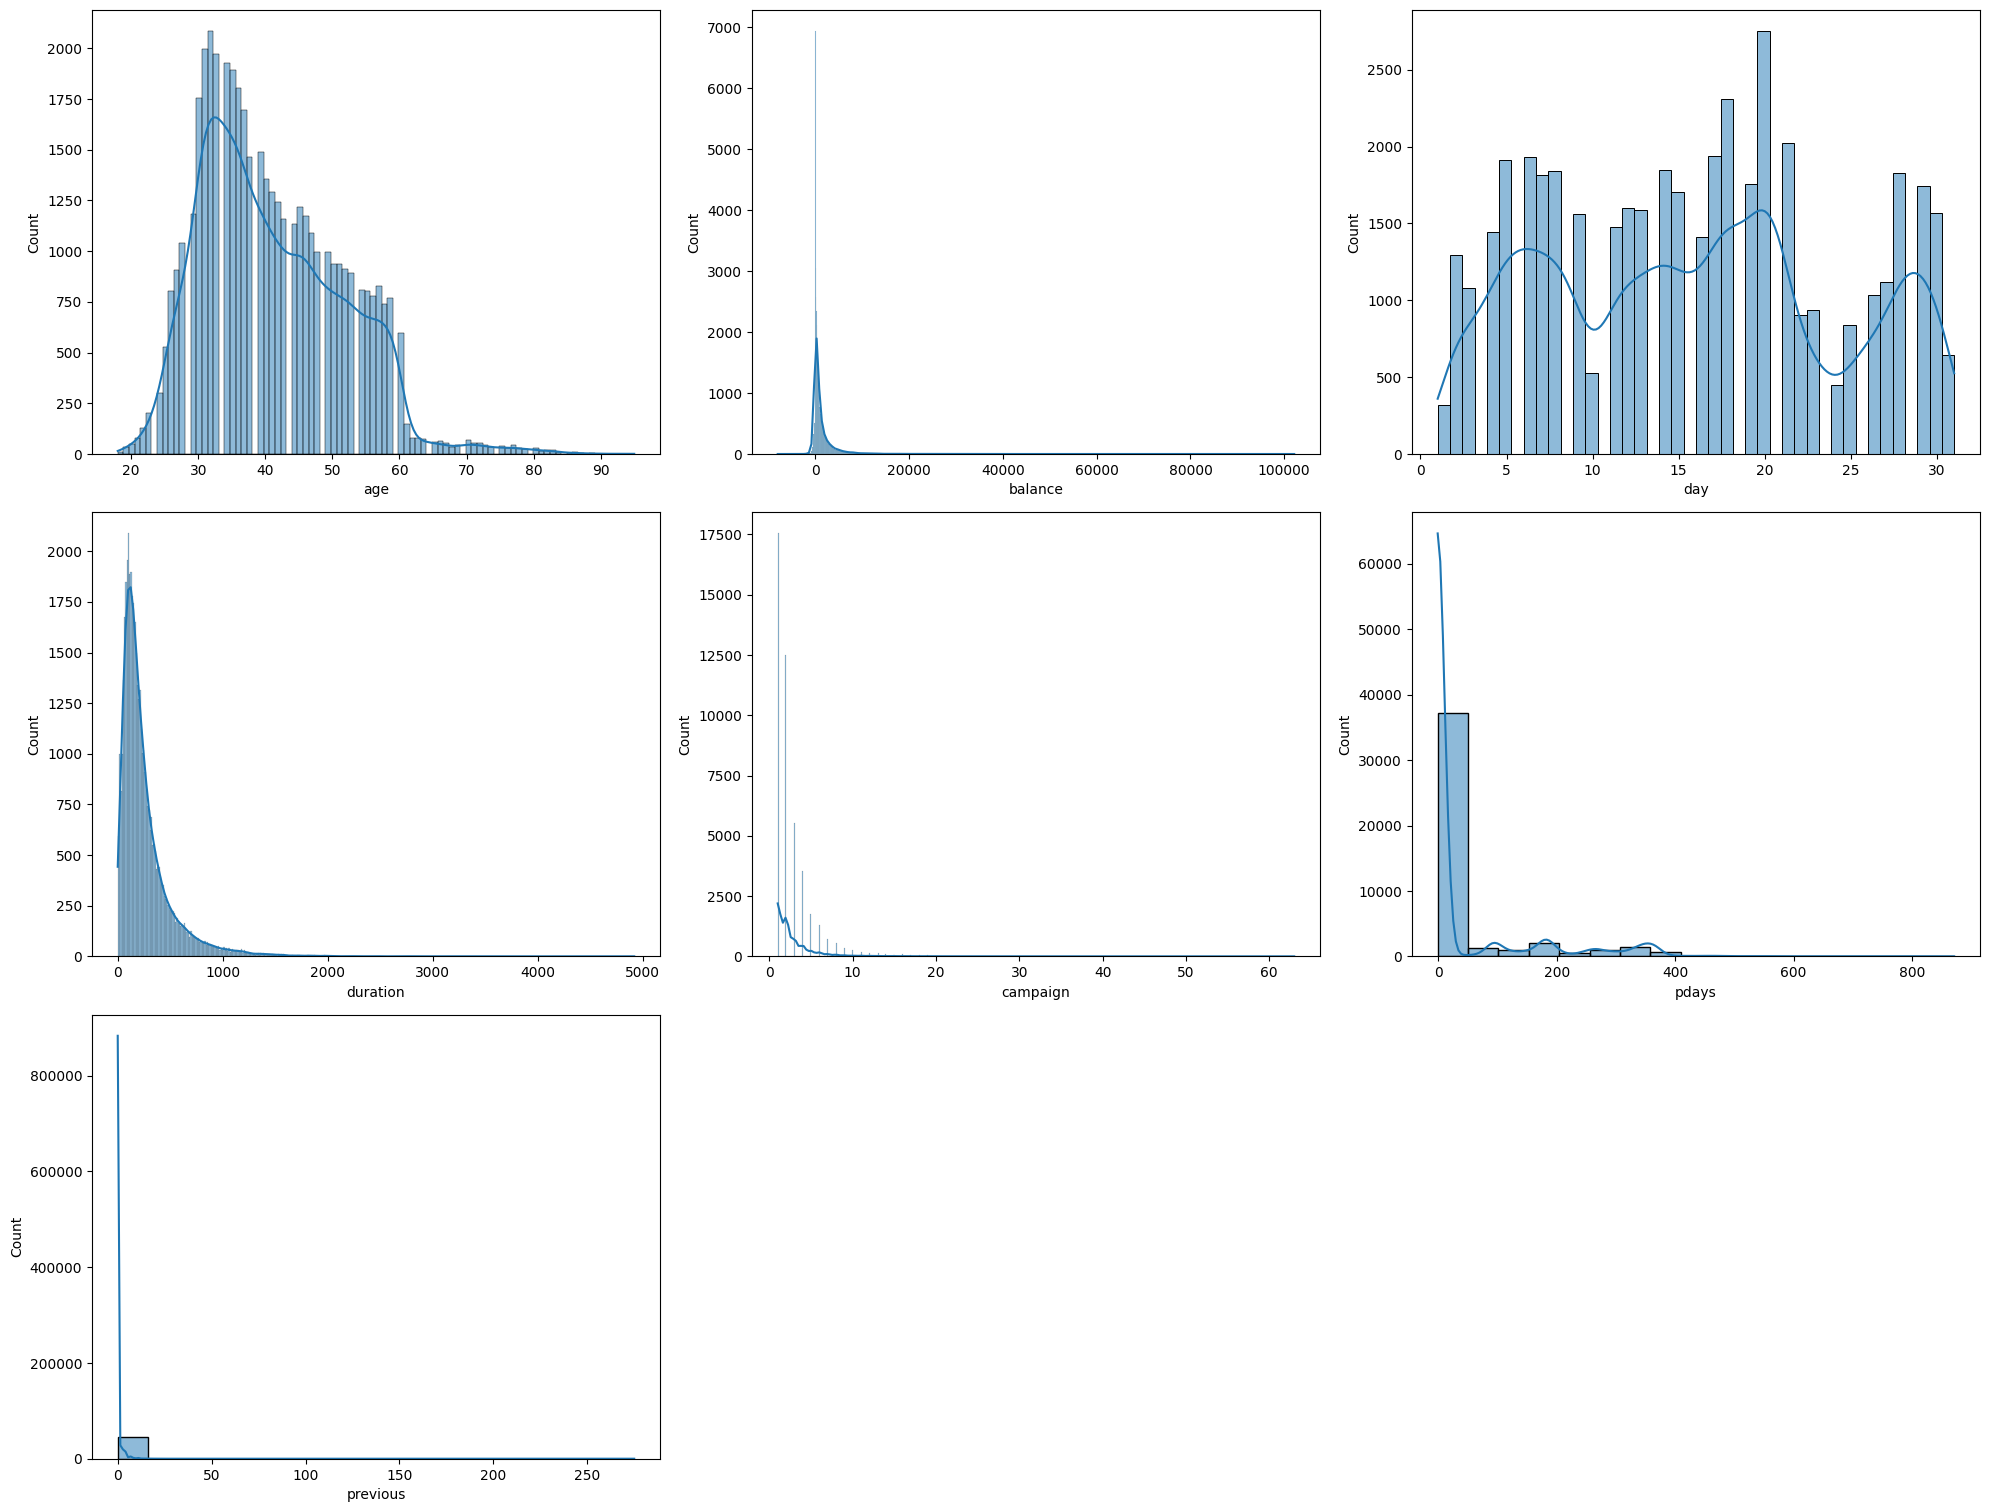

In [22]:
# Visualize the distribution of continuous features with histograms and KDE curves
# This generates subplots to display the distribution of each continuous feature

plt.figure(figsize=(20, 60), facecolor='white')  # Set the size of the entire figure (20x60 inches)
plotnumber = 1  # Initialize plot number for subplot indexing

# Loop through each continuous feature and create a subplot for its distribution
for continuous_feature in continuous_features:
    # Create a subplot in a 12x3 grid (12 rows, 3 columns) and place the plot in the correct position
    ax = plt.subplot(12, 3, plotnumber)

    # Plot histogram with a KDE (Kernel Density Estimate) curve to visualize the distribution
    sns.histplot(df[continuous_feature], kde=True)

    # Set the x-axis label as the name of the continuous feature
    plt.xlabel(continuous_feature)

    # Increment the plot number to move to the next subplot
    plotnumber += 1

# Adjust the spacing between subplots to ensure they fit neatly into the figure area
plt.tight_layout()

# Display the plots
plt.show()


12. Relation between Continous numerical Features and Labels

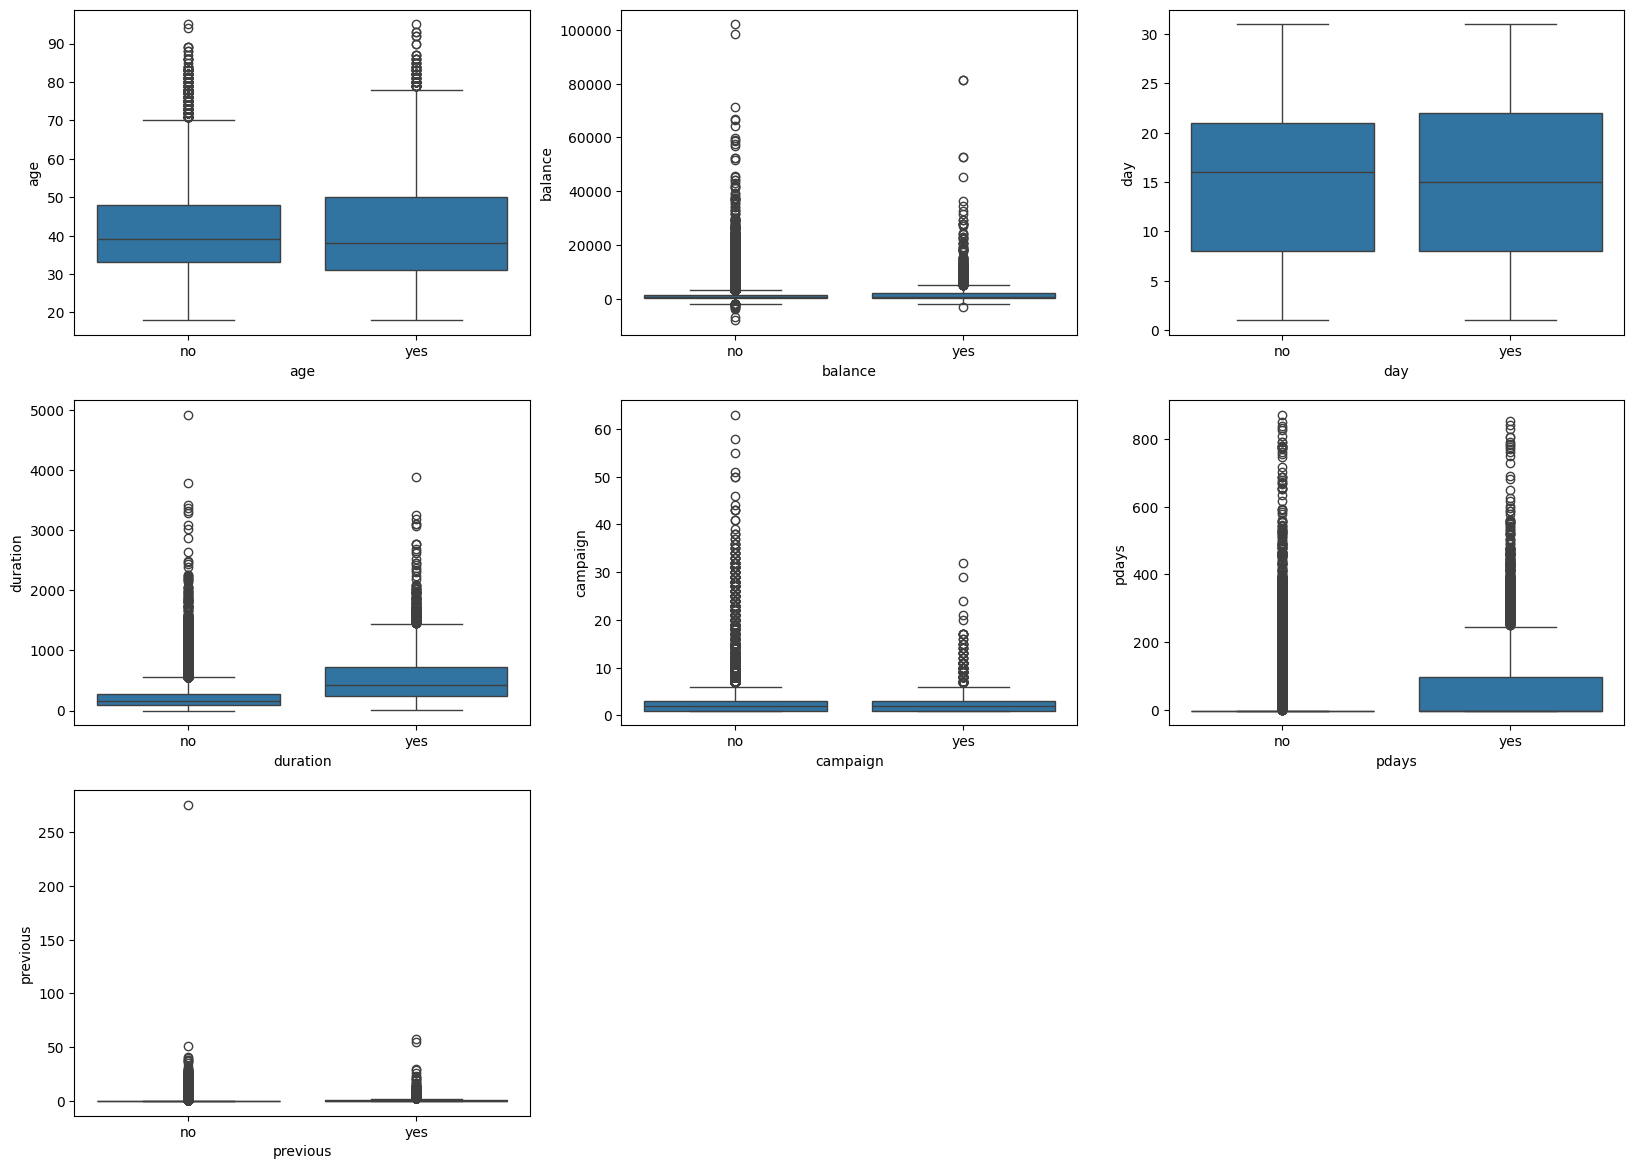

In [23]:
# Boxplot to show the distribution of the target variable 'y' with respect to numerical features
# This creates subplots to visualize how the target label 'y' is distributed for each continuous feature

plt.figure(figsize=(20, 60), facecolor='white')  # Set the figure size (20x60 inches)
plotnumber = 1  # Initialize the plot number for subplot indexing

# Loop through each continuous feature and create a boxplot
for feature in continuous_features:
    # Create a subplot in a 12x3 grid and place the boxplot in the correct position
    ax = plt.subplot(12, 3, plotnumber)

    # Create a boxplot with 'y' on the x-axis and the continuous feature on the y-axis
    sns.boxplot(x="y", y=df[feature], data=df)

    # Set the x-axis label to the name of the continuous feature
    plt.xlabel(feature)

    # Increment the plot number to move to the next subplot
    plotnumber += 1

# Display the final plot
plt.show()


13. Find Outliers in numerical features

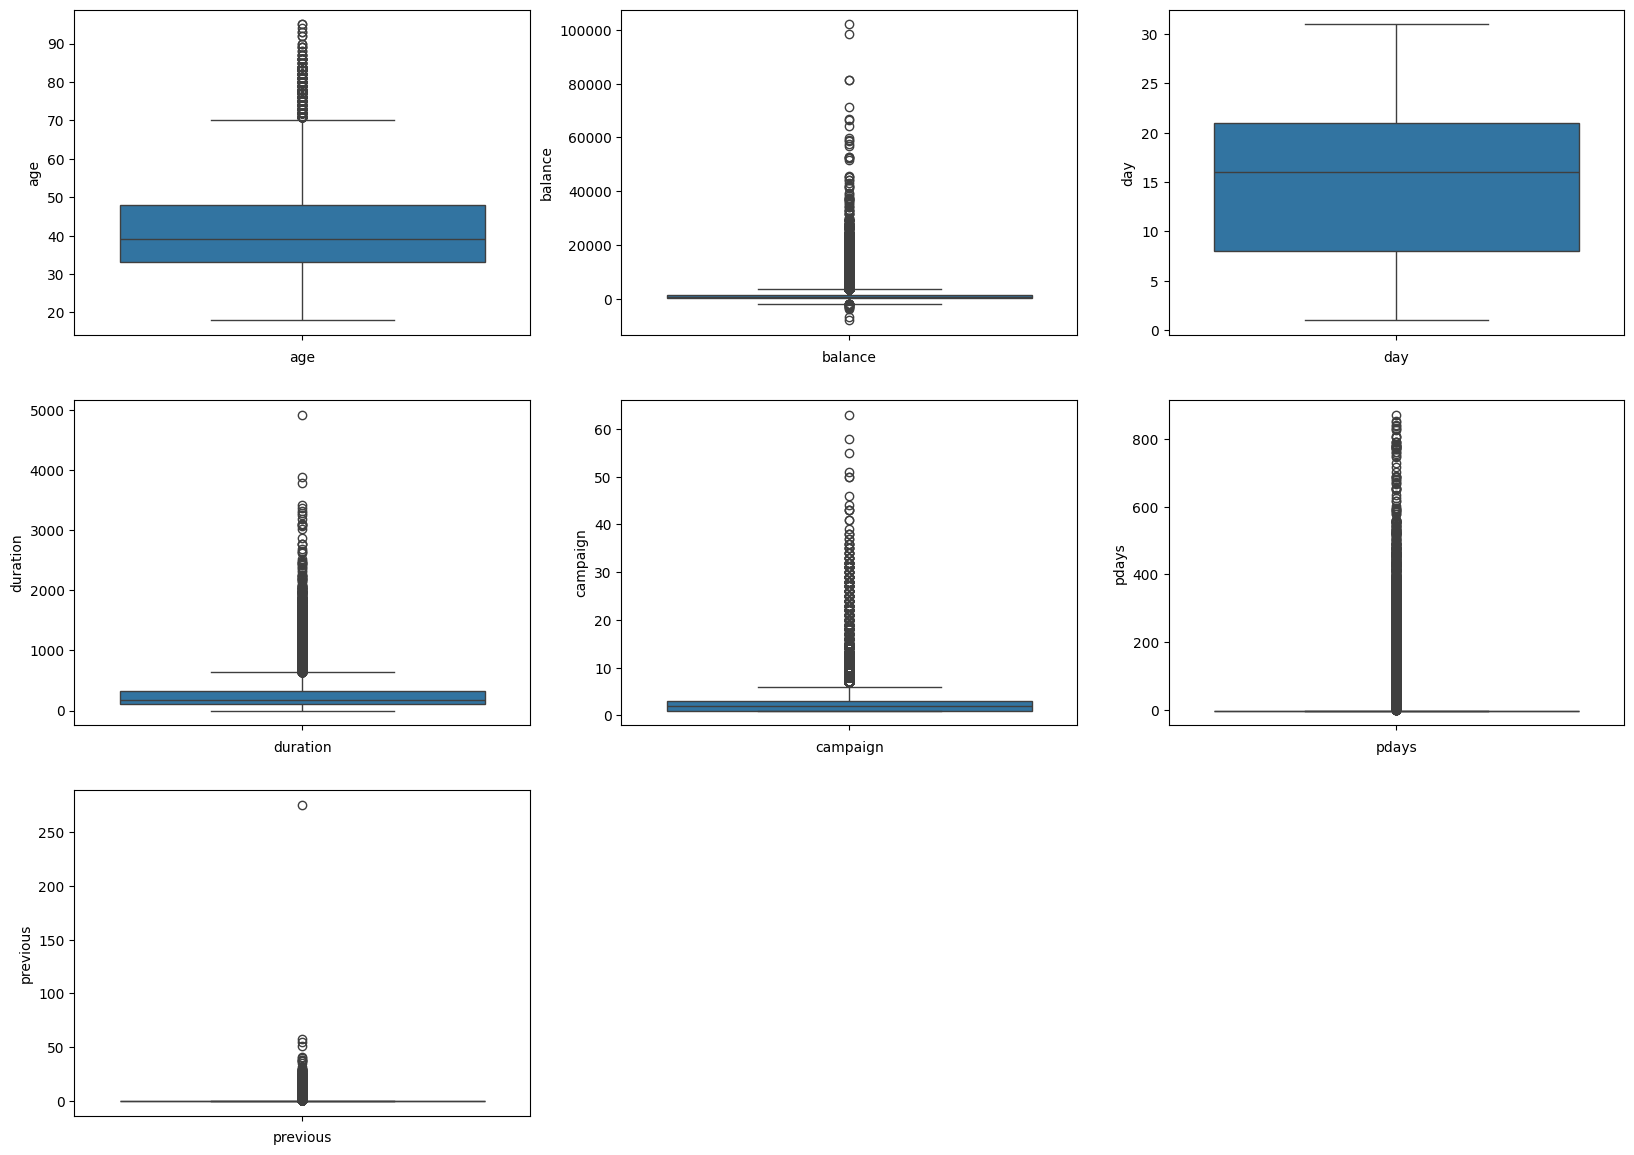

In [24]:
# Boxplot to detect outliers in numerical features
# This creates subplots to visualize the distribution of each numerical feature and identify potential outliers

plt.figure(figsize=(20, 60), facecolor='white')  # Set the figure size (20x60 inches)
plotnumber = 1  # Initialize the plot number for subplot indexing

# Loop through each numerical feature and create a boxplot
for numerical_feature in numerical_features:
    # Create a subplot in a 12x3 grid and place the boxplot in the correct position
    ax = plt.subplot(12, 3, plotnumber)

    # Create a boxplot for the current numerical feature to visualize its distribution and detect outliers
    sns.boxplot(df[numerical_feature])

    # Set the x-axis label to the name of the numerical feature
    plt.xlabel(numerical_feature)

    # Increment the plot number to move to the next subplot
    plotnumber += 1

# Display the final plot with all the boxplots
plt.show()


14. Explore the Correlation between numerical features

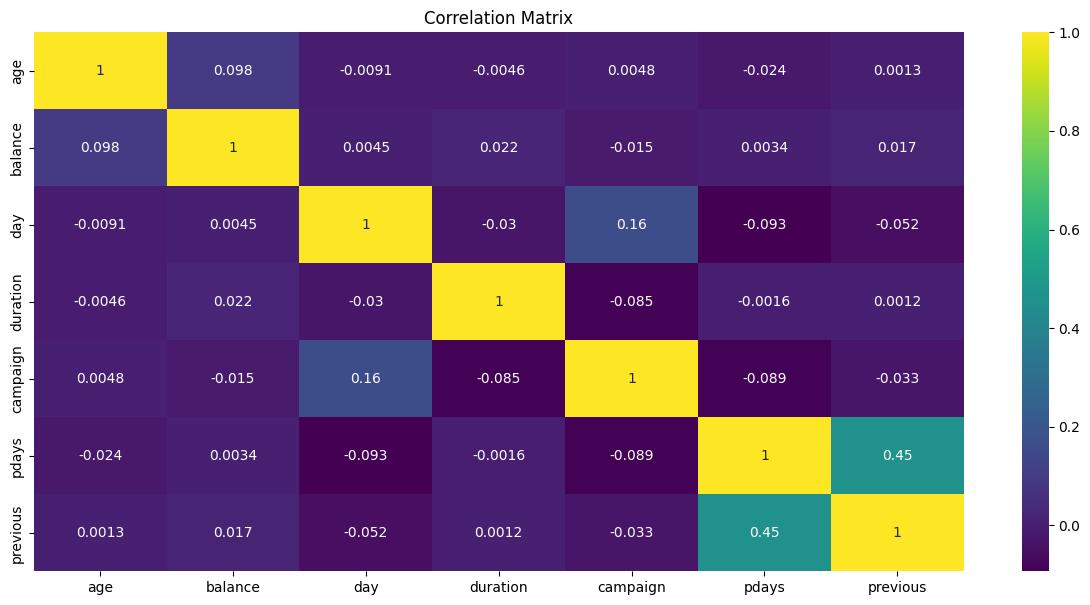

In [25]:
# Filter numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation
cor_mat = numeric_df.corr()

# Plot heatmap
fig = plt.figure(figsize=(15, 7))
sns.heatmap(cor_mat, annot=True, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()


# Feature Engineering

In [26]:
df2=df.copy()

In [27]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [28]:
df2.shape

(45211, 17)

In [29]:
# Analyze the relationship between the target variable 'y' and the 'pdays' feature
df2.groupby(['y', 'pdays']).size()

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64

In [30]:
# Drop the 'default' feature as it does not contribute significantly to the target variable
df2.drop(['default'], axis=1, inplace=True)


In [31]:
# Analyze the relationship between the target variable 'y' and the 'pdays' feature
df2.groupby(['y', 'pdays']).size()

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64

In [32]:
# Drop the 'pdays' feature as it contains a significant percentage (40%+) of '-1' values, reducing its usefulness
df2.drop(['pdays'], axis=1, inplace=True)

In [33]:
# Analyze the distribution of the 'age' feature to identify outliers
df2.groupby('age', sort=True)['age'].count()

# Remove outliers in the 'age' feature by keeping values between 18 and 95
df2 = df2[(df2['age'] >= 18) & (df2['age'] <= 95)]


In [34]:
# remove outliers in feature balance...
df2.groupby(['y','balance'],sort=True)['balance'].count()
# these outlier should not be remove as balance goes high, client show interest on deposit

y    balance
no   -8019      1
     -6847      1
     -4057      1
     -3372      1
     -3313      1
               ..
yes   34646     1
      36252     1
      45248     1
      52587     2
      81204     2
Name: balance, Length: 9258, dtype: int64

In [35]:
# Analyze the distribution of the 'duration' feature and its relationship with the target variable 'y'
df2.groupby(['y', 'duration'], sort=True)['duration'].count()
# these outlier should not be remove as duration goes high, client show interest on deposit

y    duration
no   0            3
     1            2
     2            3
     3            4
     4           15
                 ..
yes  3094         1
     3102         1
     3183         1
     3253         1
     3881         1
Name: duration, Length: 2627, dtype: int64

In [36]:
# Analyze the distribution of the 'campaign' feature and its relationship with the target variable 'y'
df2.groupby(['y', 'campaign'], sort=True)['campaign'].count()

y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
                 ...  
yes  20              1
     21              1
     24              1
     29              1
     32              1
Name: campaign, Length: 70, dtype: int64

In [37]:
df3 = df2[df2['campaign'] < 33]

In [38]:
df3.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
     6            1199
     7             688
     8             508
     9             306
     10            252
     11            185
     12            151
     13            127
     14             89
     15             80
     16             77
     17             63
     18             51
     19             44
     20             42
     21             34
     22             23
     23             22
     24             19
     25             22
     26             13
     27             10
     28             16
     29             15
     30              8
     31             12
     32              8
yes  1            2561
     2            1401
     3             618
     4             317
     5             139
     6              92
     7              47
     8              32
     9              21
     10             14
     11             16
     12              4
     13              6
     14              4
     15              4
     16              2
     17              6
     20              1
     21              1
     24              1
     29              1
     32              1
Name: campaign, dtype: int64

In [39]:
# remove outliers in feature previous...
df3.groupby(['y','previous'],sort=True)['previous'].count()

y    previous
no   0           33532
     1            2189
     2            1650
     3             848
     4             543
                 ...  
yes  26              1
     29              1
     30              1
     55              1
     58              1
Name: previous, Length: 66, dtype: int64

In [40]:
df4 = df3[df3['previous'] < 31]

In [41]:
# Encode categorical columns into binary variables and remove the original columns
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for category in categorical_columns:
    dummy_vars = pd.get_dummies(df4[category], prefix=category, drop_first=True)
    df4 = pd.concat([df4.drop(columns=category), dummy_vars], axis=1)


In [42]:
# Convert boolean-like columns to binary (1/0) and remove the original columns
boolean_columns = ['housing', 'loan', 'y']
for column in boolean_columns:
    df4[column + '_binary'] = df4[column].map({'yes': 1, 'no': 0})
    df4.drop(columns=column, inplace=True)


In [43]:
df4.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_binary,loan_binary,y_binary
0,58,2143,5,261,1,0,False,False,False,True,...,True,False,False,False,False,False,True,1,0,0
1,44,29,5,151,1,0,False,False,False,False,...,True,False,False,False,False,False,True,1,0,0
2,33,2,5,76,1,0,False,True,False,False,...,True,False,False,False,False,False,True,1,1,0
3,47,1506,5,92,1,0,True,False,False,False,...,True,False,False,False,False,False,True,1,0,0
4,33,1,5,198,1,0,False,False,False,False,...,True,False,False,False,False,False,True,0,0,0


# Check the Data set is balanced or not based on target values in classification

In [44]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['y'])  # Features
y = df['y']  # Target

# One-hot encoding for categorical variables (if necessary)
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())



Class distribution before SMOTE:
y
no     31937
yes     4231
Name: count, dtype: int64

Class distribution after SMOTE:
y
no     31937
yes    31937
Name: count, dtype: int64


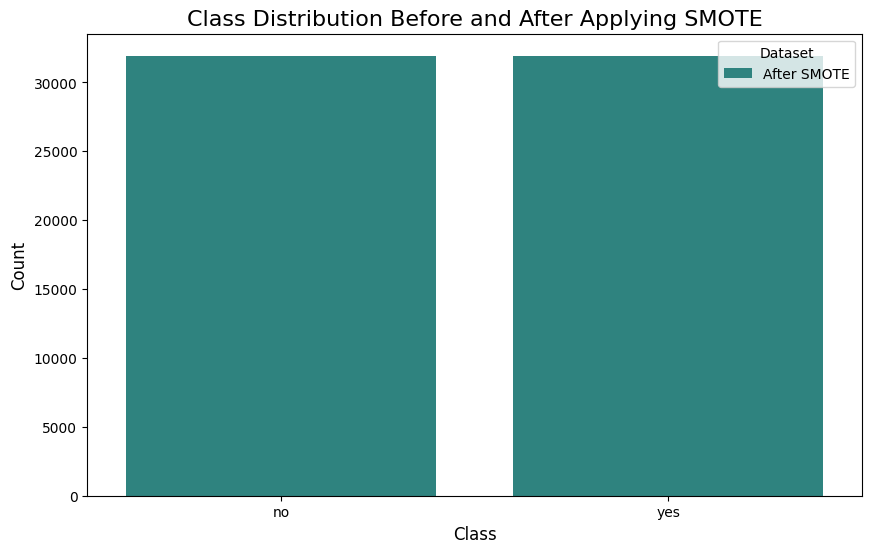

In [45]:
# Prepare data for visualization
after_smote = pd.DataFrame({'Class': y_train_smote, 'Dataset': 'After SMOTE'})
class_distribution = pd.concat([after_smote])

# Plot class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=class_distribution, x='Class', hue='Dataset', palette='viridis')
plt.title('Class Distribution Before and After Applying SMOTE', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Dataset', fontsize=10)
plt.show()

In [46]:
len(X_train)

36168

In [47]:
len(X_test)

9043

# Model Selection

In [48]:
pip install --upgrade scikit-learn imbalanced-learn


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE  # For oversampling the minority class

# Assuming you already have your data loaded into X (features) and y (target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Initialize Random Forest model with class weights
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # Automatically balances weights based on class frequencies
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




Random Forest Accuracy: 0.899037929890523
Classification Report:
               precision    recall  f1-score   support

          no       0.94      0.95      0.94      7952
         yes       0.59      0.52      0.55      1091

    accuracy                           0.90      9043
   macro avg       0.76      0.74      0.75      9043
weighted avg       0.89      0.90      0.90      9043



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='f1_macro',  # Optimizing for macro F1-score
    cv=5,
    n_jobs=-1
)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated F1 Macro Score:", grid_search.best_score_)


KeyboardInterrupt: 

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical


# Encode categorical target labels
y_encoded = pd.get_dummies(y).values  # One-hot encode the target labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Evaluate the model
print("ANN Accuracy:", accuracy_score(y_test_classes, y_pred_classes))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8806 - loss: 0.2851 - val_accuracy: 0.9012 - val_loss: 0.2132
Epoch 2/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9061 - loss: 0.2113 - val_accuracy: 0.9054 - val_loss: 0.2056
Epoch 3/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9074 - loss: 0.1978 - val_accuracy: 0.9010 - val_loss: 0.2094
Epoch 4/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9133 - loss: 0.1914 - val_accuracy: 0.9056 - val_loss: 0.2071
Epoch 5/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9175 - loss: 0.1804 - val_accuracy: 0.9053 - val_loss: 0.2030
Epoch 6/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9176 - loss: 0.1835 - val_accuracy: 0.9043 - val_loss: 0.2038
Epoch 7/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9206 - loss: 0.1756 - val_accuracy: 0.9054 - val_loss: 0.2034
Epoch 8/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9200 - loss: 0.1769 - val_accuracy: 0.

In [51]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert predictions to class labels
y_test_classes = y_test.argmax(axis=1)  # Convert one-hot-encoded test labels to class labels

# Generate the classification report
print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))


283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      7952
           1       0.52      0.53      0.53      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.73      0.73      9043
weighted avg       0.89      0.88      0.89      9043

